# Opening Suzanne's csv file 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sys

In [2]:
# 1. Load the csv file
df = pd.read_csv("/home/jovyan/OpTox/Jane/Kbrevis_Rrs_cellcounts.csv", index_col=False)

In [3]:
df

,Station,pa11_b,pa24,pa24c,pa8,pas10,pas3b,pas3c,pas5,pas8,...,gc2_29,gc2_29A,prob27_28,prob28,prob28_29,prob29,prob30,prob31,prob31_32,prob32
0,Date,1999-Sep-10,1999-Sep-11,1999-Sep-11,1999-Sep-10,1999-Sep-12,1999-Sep-13,1999-Sep-13,1999-Sep-12,1999-Sep-12,...,2003-Nov-06,2003-Nov-06,2001-Oct-23,2001-Oct-23,2001-Oct-23,2001-Oct-23,2001-Oct-23,2001-Oct-23,2001-Oct-23,2001-Oct-23
1,Time,14:43,10:07,14:24,09:13,16:23,11:25,14:30,09:36,13:49,...,19:02,19:02,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00
2,UTC,17:43,15:07,19:24,14:13,19:23,16:25,19:30,14:36,18:49,...,19:02,19:02,13:23,14:14,15:09,16:11,17:08,18:09,19:03,20:15
3,Lat,27.2945,26.8087,26.92414,27.29156,25.45084,26.54344,26.54624,26.25582,25.7779,...,27.3675,27.3675,27.35126,27.35593,27.35832,27.36599,27.37127,27.37828,27.37926,27.37701
4,Lon,-82.65716,-83.10456,-82.65666,-83.0765,-81.91166,-82.29448,-82.294,-82.11132,-81.96312,...,82.7988,82.7988,82.80051,82.80981,82.81405,82.81725,82.82089,82.8229,82.82293,82.82298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,830,0.000357889,0.000437502,3.28244E-05,0.000422649,0.000302138,0.000172145,0.000314706,0.000488986,0.000456137,...,0.000090045,0.000076955,-999,-999,-999,-999,-999,-999,-999,-999
95,835,0.000371378,0.00047205,5.76229E-05,0.000477529,0.000306221,0.000188928,0.000345315,0.00044811,0.000488877,...,0.000081045,0.000052055,-999,-999,-999,-999,-999,-999,-999,-999
96,840,0.000356146,0.000455384,5.76598E-05,0.000473892,0.000290717,0.000176526,0.000326976,0.000447737,0.000498908,...,0.000080245,0.000057655,-999,-999,-999,-999,-999,-999,-999,-999
97,845,0.000362377,0.000473672,6.88525E-05,0.000493315,0.000292887,0.00019064,0.000334201,0.000468814,0.000515931,...,0.000080445,0.000060055,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
# 2. Transpose and select the concentration/L
df_t = df.set_index('Station').T.reset_index().rename(columns={'index': 'Sample_ID'})

In [5]:
df_t['CellsperL'] = pd.to_numeric(df_t['CellsperL'], errors='coerce')

In [6]:
df_t['CellsperL'].describe()

count    3.600000e+01
mean     1.748889e+05
std      4.194615e+05
min      0.000000e+00
25%      7.500000e+02
50%      3.500000e+03
75%      3.000000e+04
max      1.850000e+06
Name: CellsperL, dtype: float64

In [7]:
# 3. Bin the data based on toxicity levels
bins = [-1,1000,5000,100000,1000000,float('inf')]
labels = ["very low", "low", "moderate", "high", "extremely high"]

df_t['CellsperL_range'] = pd.cut(df_t['CellsperL'], bins=bins, labels=labels)

In [8]:
df_t

Station,Sample_ID,Date,Time,UTC,Lat,Lon,CellsperL,Depth,NaN,400,...,810,815,820,825,830,835,840,845,850,CellsperL_range
0,pa11_b,1999-Sep-10,14:43,17:43,27.2945,-82.65716,5000,0,NaN,0.002991565,...,0.000326602,0.000394088,0.000347837,0.000321768,0.000357889,0.000371378,0.000356146,0.000362377,0.000387654,low
1,pa24,1999-Sep-11,10:07,15:07,26.8087,-83.10456,2000,0,NaN,0.008970086,...,0.000329189,0.000424759,0.000405186,0.000394528,0.000437502,0.00047205,0.000455384,0.000473672,0.000501019,low
2,pa24c,1999-Sep-11,14:24,19:24,26.92414,-82.65666,3000,0,NaN,0.004180113,...,9.1586E-05,7.44388E-05,3.86285E-05,1.6707E-05,3.28244E-05,5.76229E-05,5.76598E-05,6.88525E-05,8.47567E-05,low
3,pa8,1999-Sep-10,09:13,14:13,27.29156,-83.0765,0,0,NaN,0.007441397,...,0.000307998,0.000380165,0.000361668,0.000357207,0.000422649,0.000477529,0.000473892,0.000493315,0.000527538,very low
4,pas10,1999-Sep-12,16:23,19:23,25.45084,-81.91166,3000,0,NaN,0.005501232,...,0.000294494,0.000368522,0.000300398,0.000267259,0.000302138,0.000306221,0.000290717,0.000292887,0.000327967,low
5,pas3b,1999-Sep-13,11:25,16:25,26.54344,-82.29448,57000,0,NaN,0.001627874,...,0.000225713,0.000222401,0.000198771,0.000173154,0.000172145,0.000188928,0.000176526,0.00019064,0.000206195,moderate
6,pas3c,1999-Sep-13,14:30,19:30,26.54624,-82.294,65000,0,NaN,0.002014055,...,0.000315712,0.000308394,0.000344961,0.000330531,0.000314706,0.000345315,0.000326976,0.000334201,0.000344166,moderate
7,pas5,1999-Sep-12,09:36,14:36,26.25582,-82.11132,2000,0,NaN,0.00425602,...,0.000483824,0.000682593,0.000441378,0.000363111,0.000488986,0.00044811,0.000447737,0.000468814,0.000551682,low
8,pas8,1999-Sep-12,13:49,18:49,25.7779,-81.96312,4000,0,NaN,0.001881421,...,0.000431332,0.000458372,0.000457908,0.000452256,0.000456137,0.000488877,0.000498908,0.000515931,0.000543703,low
9,gc2_3a,2003-Nov-04,14:48,14:48,27.29712,82.66161,1000,1,NaN,0.002453385,...,0.000090185,0.000049585,0.000056585,0.000061785,0.000057385,0.000056685,0.000068785,0.000067885,0.000043185,very low


In [9]:
# 4. Drop the data for every wavelength above 720
cols = df_t.columns.tolist()
idx_720 = cols.index('720')
    
drop_cols = [col for col in df_t.columns if isinstance(col,str) and col.isdigit() and int(col)>720]
df_t.drop(columns=drop_cols, axis=1, inplace=True)

In [10]:
# 5. Group the Rrs spectra by toxicity levels and average them
rrs_cols = [col for col in df_t.columns if isinstance(col,str) and col.isdigit() and 400 <= int(col) <= 720]
df_t[rrs_cols] = df_t [rrs_cols].apply(pd.to_numeric, errors ='coerce')
rrs_mean_by_range = df_t.groupby('CellsperL_range')[rrs_cols].mean()

In [11]:
rrs_mean_by_range

Station,400,405,410,415,420,425,430,435,440,445,...,675,680,685,690,695,700,705,710,715,720
CellsperL_range,,,,,,,,,,,,,,,,,,,,,
very low,0.002293,0.002340,0.002359,0.002364,0.002414,0.002506,0.002589,0.002653,0.002733,0.002867,...,0.000388,0.000405,0.000414,0.000316,0.000234,0.000196,0.000185,0.000156,0.000059,-0.000064
low,0.002729,0.002692,0.002655,0.002670,0.002663,0.002689,0.002736,0.002738,0.002768,0.002857,...,0.000550,0.000576,0.000562,0.000482,0.000414,0.000347,0.000312,0.000258,0.000216,0.000161
moderate,0.001635,0.001620,0.001593,0.001650,0.001655,0.001717,0.001793,0.001814,0.001868,0.001956,...,0.001127,0.001260,0.001264,0.001129,0.000944,0.000768,0.000656,0.000562,0.000468,0.000442
high,0.001267,0.001273,0.001283,0.001307,0.001348,0.001378,0.001391,0.001425,0.001474,0.001545,...,0.002267,0.002804,0.003039,0.002797,0.002244,0.001769,0.001446,0.001239,0.001192,0.001144
extremely high,0.001345,0.001374,0.001391,0.001432,0.001490,0.001534,0.001562,0.001611,0.001671,0.001755,...,0.002135,0.002589,0.002762,0.002523,0.002032,0.001610,0.001329,0.001156,0.001110,0.001107


In [12]:
# 6. Save it into a csv
rrs_mean_by_range.to_csv("Rrs_byrange.csv")

In [13]:
# 7. Plot it
wvs = [int(w) for w in rrs_cols]

In [14]:
toxicity_colors = {
    'very low': 'green',
    'low': 'yellowgreen',
    'moderate': 'orange',
    'high': 'red',
    'extremely high': 'darkred'
}

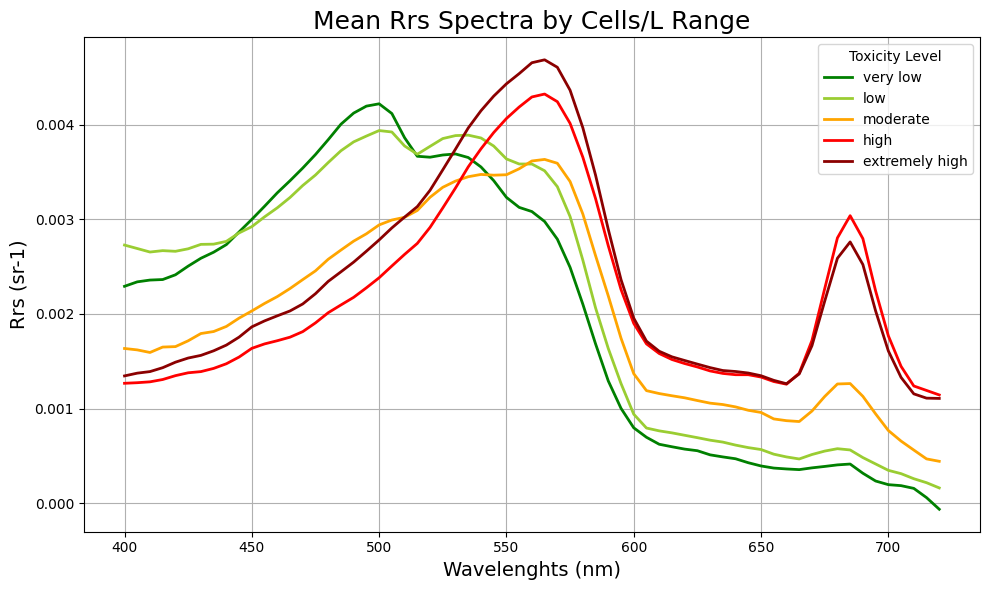

In [15]:
plt.figure(figsize=(10,6))
for label, row in rrs_mean_by_range.iterrows():
    plt.plot(wvs, row.values, label=str(label), color=toxicity_colors.get(label, 'gray'), linewidth=2)

plt.xlabel("Wavelenghts (nm)", size=14)
plt.ylabel("Rrs (sr-1)", size=14)
plt.title("Mean Rrs Spectra by Cells/L Range", size=18)
plt.legend(title="Toxicity Level")
plt.grid(True)
plt.tight_layout()
plt.show()

Plot Rrs spectra for each individual station (instead of mean per toxicity range), Color the lines based on toxin concentration levels, Split the plots by year (e.g., one plot per year: 1999, 2001, etc.), Add legends with both station ID and cell concentration.

In [16]:
# 8. Parse date and extract year
df_t['Date'] = pd.to_datetime(df_t['Date'], format="%Y-%b-%d", errors='coerce')
df_t['Year'] = df_t['Date'].dt.year

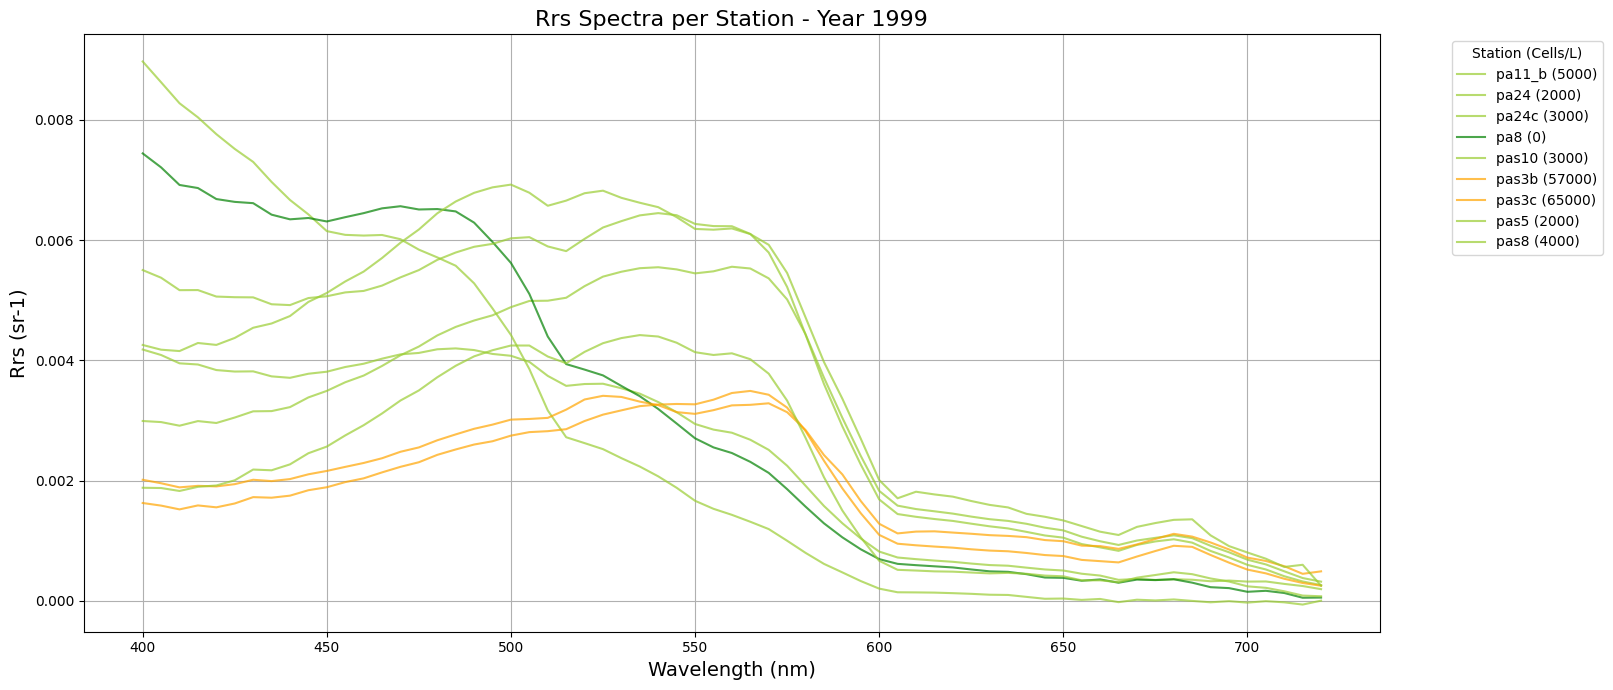

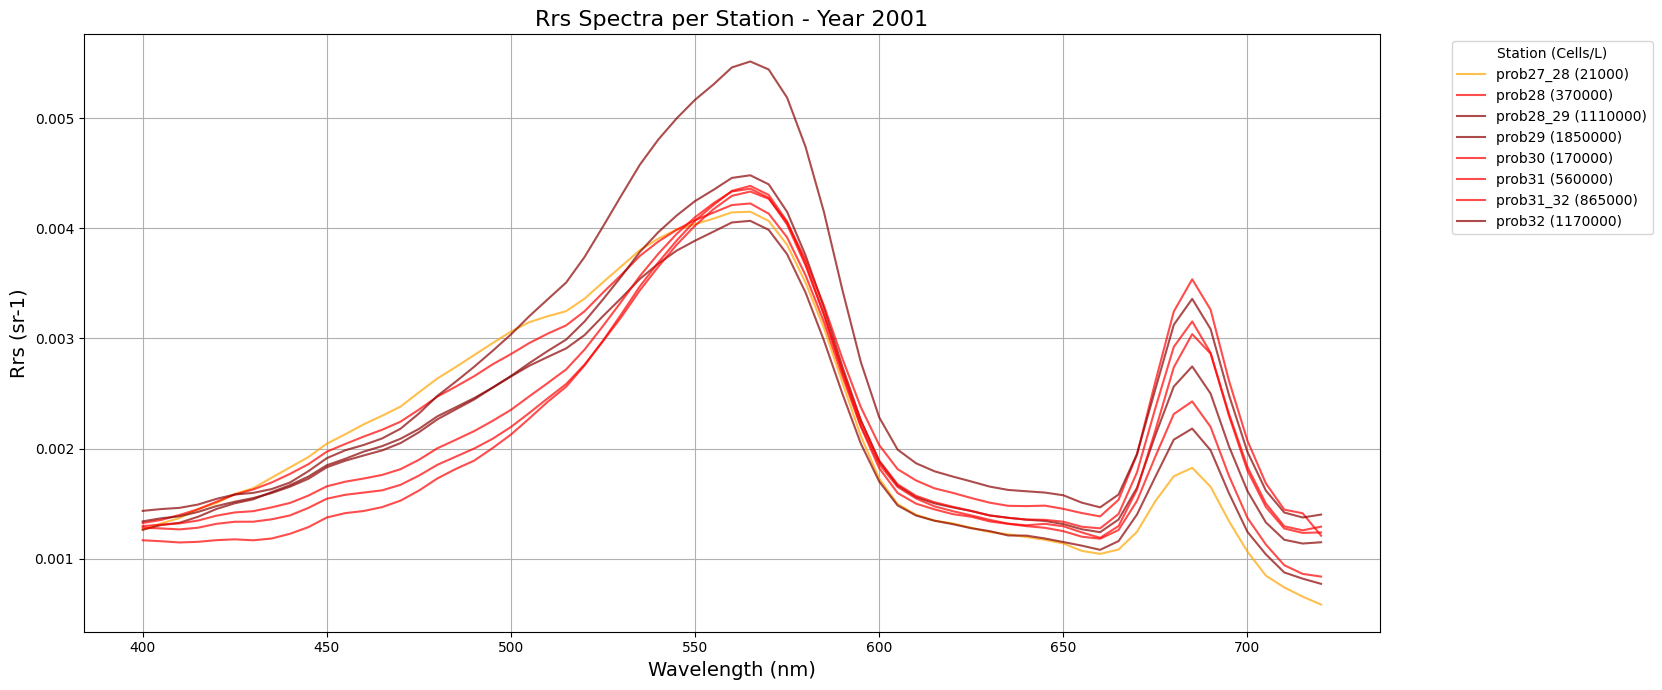

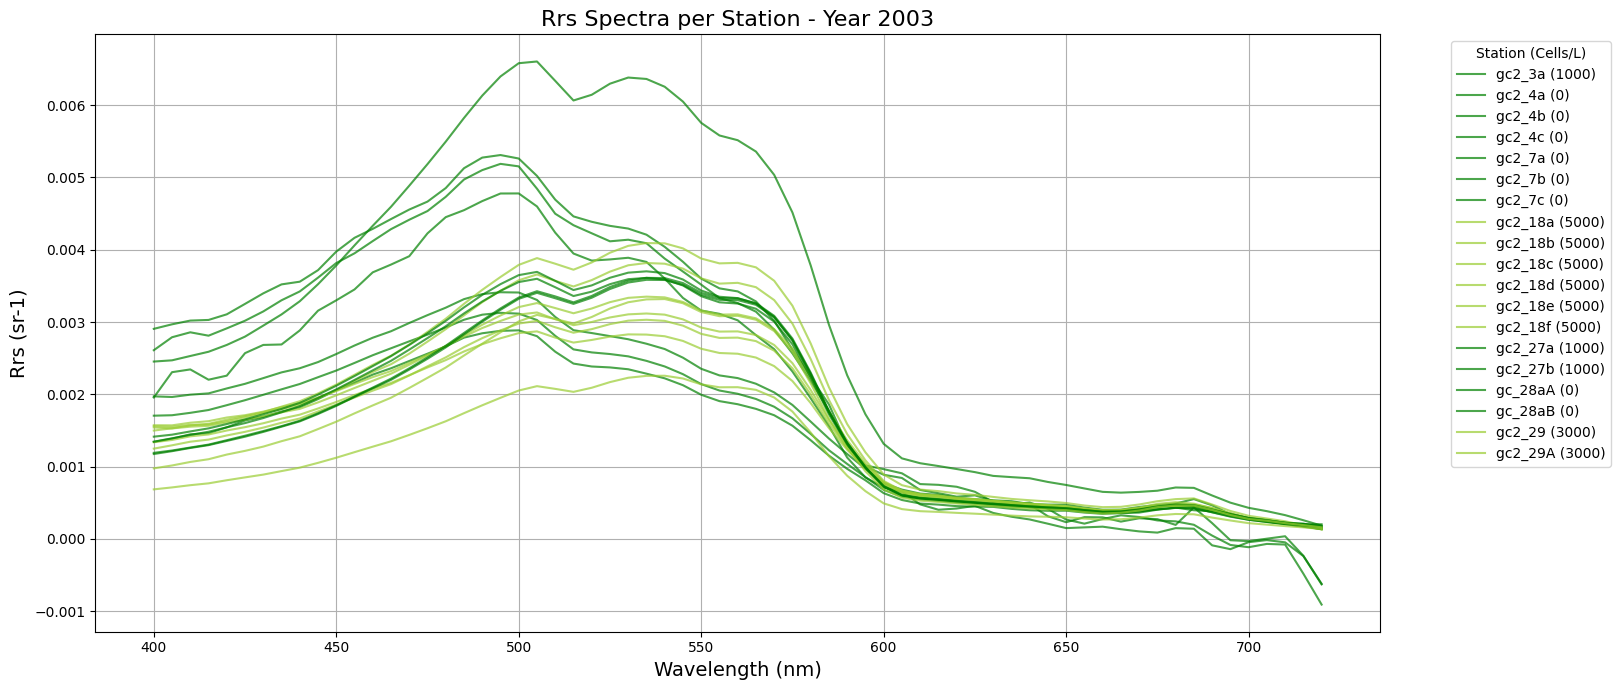

In [17]:
# 9. Plot each station per year and display the results with toxicity levels and concentration
years = sorted(df_t['Year'].dropna().unique())

for year in years:
    plt.figure(figsize=(14, 7))
    df_year = df_t[df_t['Year'] == year]
    
    for i in range(len(df_year)):
        row = df_year.iloc[i]
        rrs_values = row[rrs_cols].astype(float).values
        color = toxicity_colors.get(row['CellsperL_range'], 'gray')
        label = f"{row['Sample_ID']} ({int(row['CellsperL']) if pd.notna(row['CellsperL']) else 'NaN'})"
        plt.plot(wvs, rrs_values, color=color, alpha=0.7, label=label)

    plt.title(f"Rrs Spectra per Station - Year {int(year)}", fontsize=16)
    plt.xlabel("Wavelength (nm)", fontsize=14)
    plt.ylabel("Rrs (sr-1)", fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Station (Cells/L)", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')
    plt.show()

Let's try some animation, just for fun!

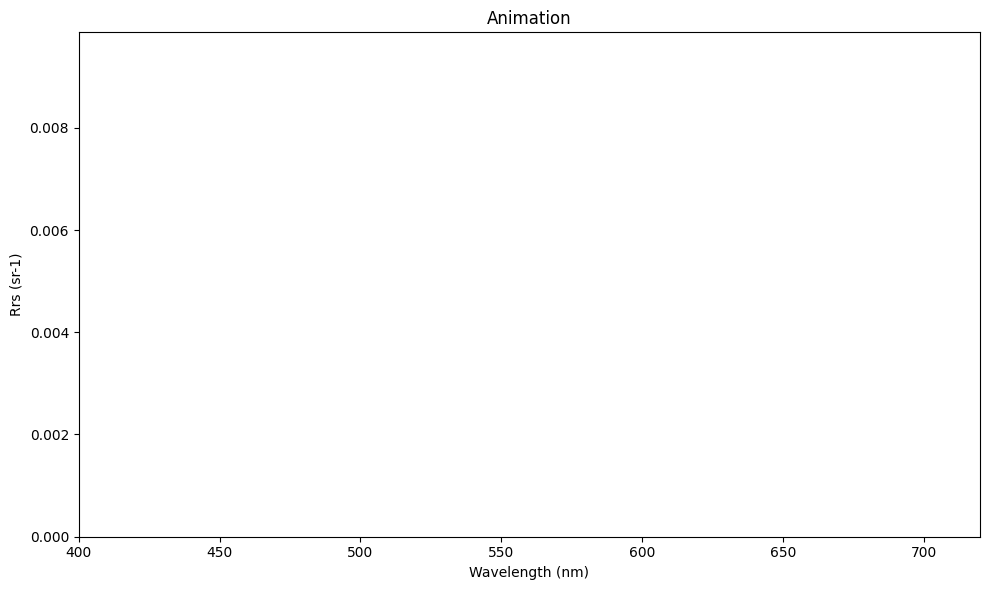

In [18]:
df_t.sort_values(by='Date', inplace=True) # just to make sure..
dates = sorted(df_t['Date'].dropna().unique())

fig, ax = plt.subplots(figsize=(10,6))
lines = []
stations = df_t['Sample_ID'].unique()

for _ in stations:
    line, = ax.plot([], [], lw=1)
    lines.append(line)

ax.set_xlim(min(wvs), max(wvs))
ax.set_ylim(0, df_t[rrs_cols].max().max()*1.1)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Rrs (sr-1)')
title = ax.set_title('Animation')

def animate(i):
    current_date = dates[i]
    subset = df_t[df_t['Date'] == current_date]
    print(f"Frame {i}, Date: {current_date}, Samples: {len(subset)}")  # Debug print
    title.set_text(f"Date: {current_date.strftime('%Y-%m-%d')}")

    for j, (_, row) in enumerate(subset.iterrows()):
        if j < len(lines):
            lines[j].set_data(wvs, row[rrs_cols].values)
            lines[j].set_label(f"{row['Sample_ID']} ({int(row['CellsperL'])})")

    ax.legend(loc='upper right', fontsize=8)
    return lines + [title]

ani = FuncAnimation(fig, animate, frames=len(dates), interval=500, blit=False)

sys.modules[__name__].__dict__['ani'] = ani

plt.tight_layout()
plt.show()

Let's do some absorption and backscattering coefficients right now! 

In [19]:
df_bb = pd.read_csv("/home/jovyan/OpTox/SuCa/Kbrevis_bb.csv", index_col=False)

In [20]:
df_bb = df_bb[['Wavelength', '13:00']]

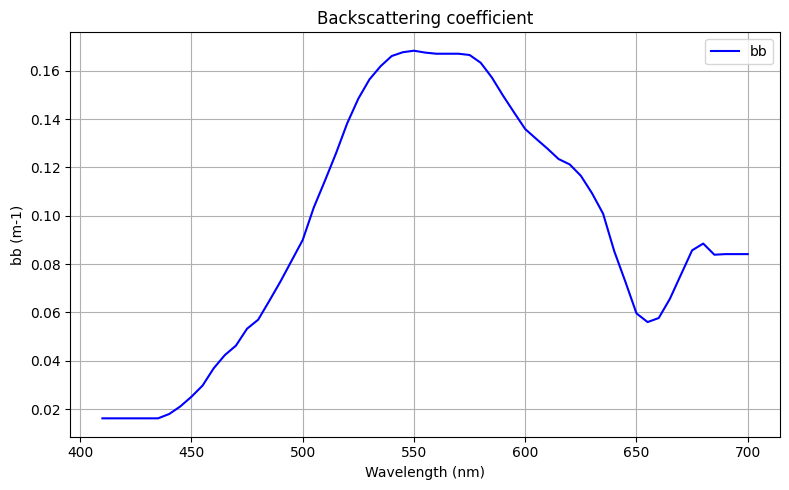

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(df_bb['Wavelength'], df_bb['13:00'], label='bb', color='blue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('bb (m-1)')
plt.title('Backscattering coefficient')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
df_t_grouped = df_t.groupby('CellsperL_range').mean(numeric_only=True)
rrs_grouped = df_t_grouped.loc[:, (df_t_grouped.columns.astype(str).str.isnumeric())]
rrs_grouped = rrs_grouped.loc[:, (rrs_grouped.columns.astype(int) >= 410) & (rrs_grouped.columns.astype(int) <= 700)]
rrs_grouped.columns = rrs_grouped.columns.astype(int)

In [23]:
df_bb = df_bb[(df_bb['Wavelength'] >= 410) & (df_bb['Wavelength'] <= 700)].set_index('Wavelength')

In [25]:
# Compute absorption coefficient a from Rrs = 0.33 * (bb / (a + bb))
# Solving for a: a = bb * (0.33 / Rrs - 1)
a_grouped = pd.DataFrame(index=rrs_grouped.index, columns=rrs_grouped.columns)
for group in rrs_grouped.index:
    rrs = rrs_grouped.loc[group]
    a = df_bb['13:00'] * (0.33 / rrs - 1)
    a_grouped.loc[group] = a

a_grouped = a_grouped.astype(float)
a_grouped.head()

Station,410,415,420,425,430,435,440,445,450,455,...,655,660,665,670,675,680,685,690,695,700
CellsperL_range,,,,,,,,,,,,,,,,,,,,,
very low,2.250984,2.245660,2.198656,2.117670,2.049158,1.999337,2.153910,2.410517,2.739804,3.098157,...,49.774334,52.590378,61.002119,66.819747,72.758401,72.089537,66.849191,87.708424,118.467417,141.850729
low,1.997896,1.986831,1.992087,1.972322,1.938320,1.936629,2.127075,2.419269,2.812509,3.213559,...,35.644524,38.898517,46.273371,48.478339,51.286420,50.634077,49.133976,57.531090,66.908147,79.933487
moderate,3.340470,3.224225,3.214678,3.098988,2.965695,2.930843,3.159722,3.542766,4.057375,4.620213,...,20.705698,21.778170,25.022711,25.565996,24.996730,23.088886,21.810968,24.502859,29.330412,36.056999
high,4.152544,4.074519,3.950645,3.863535,3.828718,3.737385,4.010165,4.492214,5.042727,5.801358,...,14.323506,15.082478,15.688311,14.443460,12.388618,10.326520,9.024747,9.843663,12.288346,15.608463
extremely high,3.828136,3.717481,3.571875,3.469101,3.406559,3.303793,3.534795,3.950710,4.425622,5.064951,...,14.184479,15.022938,15.782838,14.925189,13.159742,11.192383,9.939813,10.922552,13.577169,17.165855


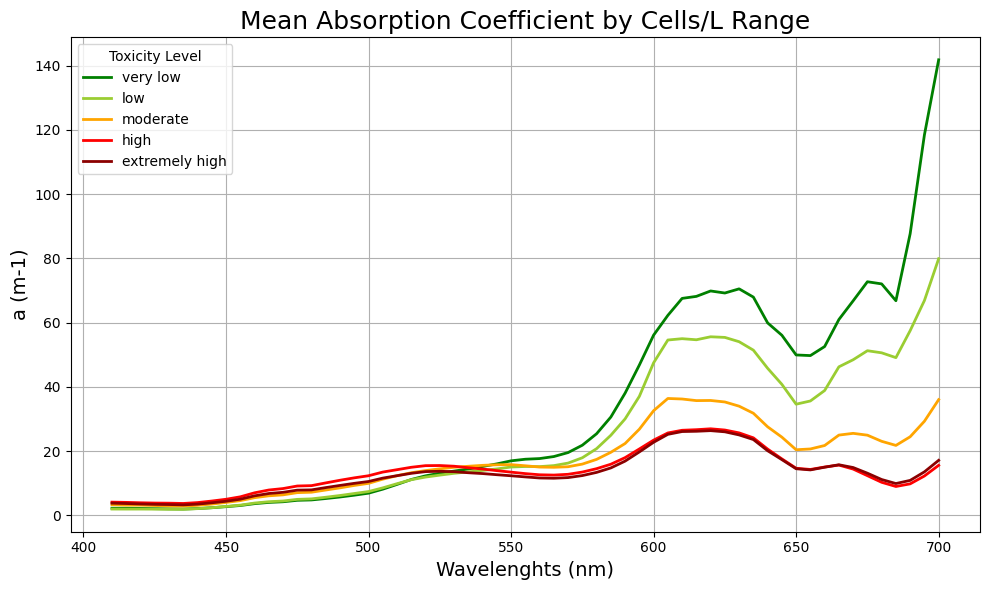

In [32]:
# Plot absorption

plt.figure(figsize=(10,6))
for label, row in a_grouped.iterrows():
    plt.plot(a_grouped.columns, row.values, label=str(label), color=toxicity_colors.get(label, 'gray'), linewidth=2)

plt.xlabel("Wavelenghts (nm)", size=14)
plt.ylabel("a (m-1)", size=14)
plt.title("Mean Absorption Coefficient by Cells/L Range", size=18)
plt.legend(title="Toxicity Level")
plt.grid(True)
plt.tight_layout()
plt.show()